In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#we divide the image data by 255 to normalize it into 0-1 range, after converting into floating point variables

train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


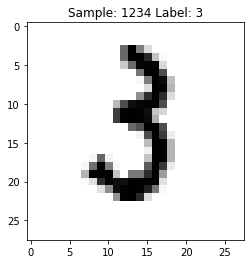

In [4]:
import matplotlib.pyplot as plt

def display_sample(num):
    
    #sample's label
    lb = train_labels[num]
    #sample's image
    img = train_images[num]
    
    #print the one-hot array of this sample's label
    print(lb)
    
    #print the label converted back to a number
    label = lb.argmax(axis = 0)
    
    #Reshape the 768 values into 28x28 image
    image = img.reshape([28,28])
    
    #plot the image
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)    #some random num values

In [5]:
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = RMSprop(),
              metrics = ["accuracy"])

In [8]:
history = model.fit(train_images, train_labels, 
                    batch_size = 100, 
                    epochs = 10, 
                    verbose = 2, 
                    validation_data = (test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 42s - loss: 0.2404 - acc: 0.9267 - val_loss: 0.0950 - val_acc: 0.9707
Epoch 2/10
 - 35s - loss: 0.1040 - acc: 0.9689 - val_loss: 0.0888 - val_acc: 0.9732
Epoch 3/10
 - 34s - loss: 0.0773 - acc: 0.9774 - val_loss: 0.0762 - val_acc: 0.9780
Epoch 4/10
 - 35s - loss: 0.0651 - acc: 0.9801 - val_loss: 0.0726 - val_acc: 0.9799
Epoch 5/10
 - 34s - loss: 0.0526 - acc: 0.9845 - val_loss: 0.0715 - val_acc: 0.9816
Epoch 6/10
 - 38s - loss: 0.0482 - acc: 0.9860 - val_loss: 0.0771 - val_acc: 0.9823
Epoch 7/10
 - 37s - loss: 0.0443 - acc: 0.9876 - val_loss: 0.0888 - val_acc: 0.9796
Epoch 8/10
 - 44s - loss: 0.0403 - acc: 0.9885 - val_loss: 0.0879 - val_acc: 0.9834
Epoch 9/10
 - 39s - loss: 0.0357 - acc: 0.9896 - val_loss: 0.1010 - val_acc: 0.9789
Epoch 10/10
 - 40s - loss: 0.0336 - acc: 0.9913 - val_loss: 0.1039 - val_acc: 0.9824


In [9]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10394233567130014
Test accuracy: 0.9824


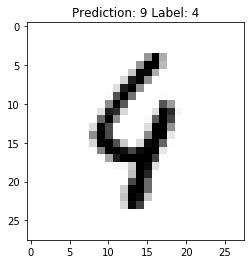

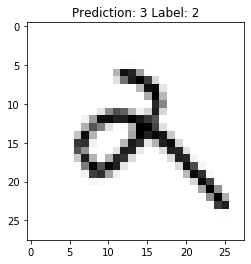

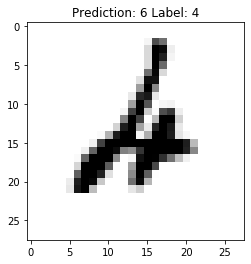

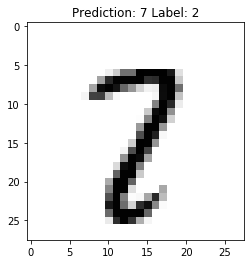

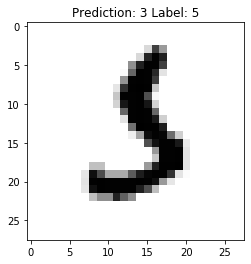

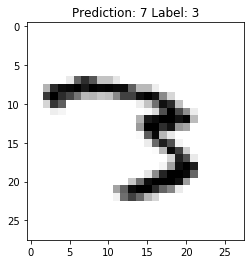

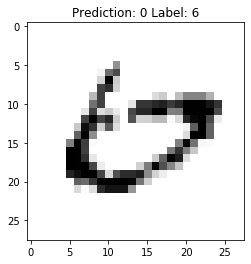

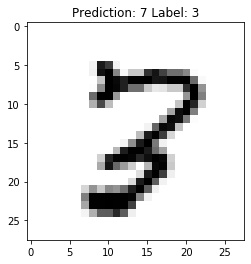

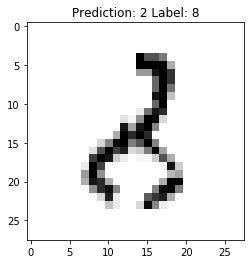

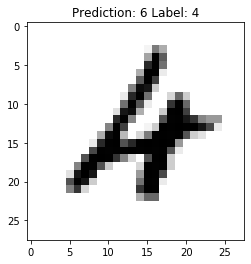

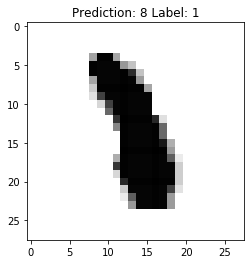

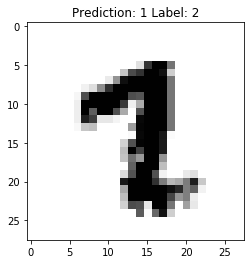

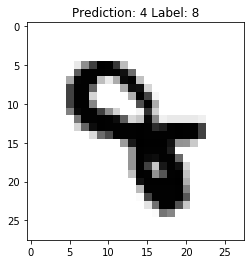

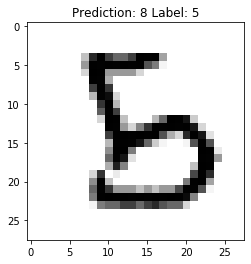

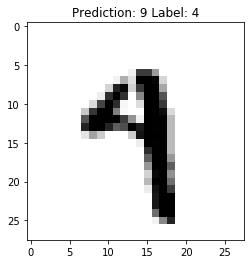

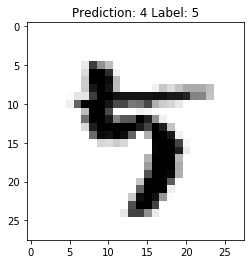

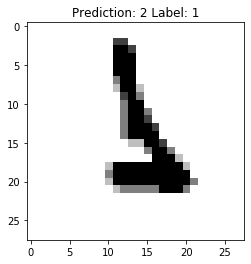

In [10]:
for x in range(1000):
    
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    
    #if the prediction does not match the correct label, display it
    if(predicted_cat != label):
        plt.title("Prediction: %d Label: %d" % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap = plt.get_cmap("gray_r"))
        plt.show()